<a href="https://colab.research.google.com/github/dwkaris/Week9Project/blob/master/DuncanKariuki_Week9_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEK 9 INDEPENDENT PROJECT

##DEFINING THE ANALYTIC QUESTION QUESTION

###a). Specifying the analytic question

As Data Scientists, we have been tasked with building a model that correctly predict if a passenger will survive a shiping accident.

###b). Defining the metrics of success

Our success will be determined by building a model with the highest accuracy, we will use the confusion matrix and classification report to determie our accuracy.

###c) Understanding the Context

As Data Scientists, we have been tasked with studing data collected from the Titanic ship accident that recorded information of survivers and non survivers. Later onwards, build a model that predicts whether a patient will survive a shipping accident or not.

###d). Recording the Experimental Design

Below is the expected workflow of our Analysis

1.   Data Cleaning and Preparation

*   Load libraries and dataset
*   Deal with mising values
  
2.   Perform EDA

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

3.  Spliting dataset into testing and training data

4.  Perform classification using the Knearest Classifier, using the best hyperparamers.

5. Compute the accuracy (percentage of correct classification).
6.  Repeat step 3 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
7.  Provide further recommendations to improve both classifiers.


###e) Data relevance/ Appropriateness of Data

Our study aims at creating the best model that predict whether or not a passenger survives a shipping accident or not.Below is the link and dataset glosary:

1. https://archive.org/download/train5_202002/train%20%285%29.csv

2.   Glosary:

*   Survived
*   PassengerId
*Name
*Sex
*Age
*SibSp
*Parch
*Ticket
*Fare
*Cabin
*Embarked

## Importing Libraries

In [98]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

## Load the Dataset

In [99]:
# Load Dataset

survive = pd.read_csv('train.csv', index_col= 'PassengerId')


In [100]:
# Preview the top 5 rows of our dataset

survive.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# Preview the last 5 rows of our 

survive.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Checking the data

In [102]:
# Checking the shape of our data
survive.shape

# our data has 891 rows and 11 column

(891, 11)

In [103]:
# Checking for infomation about a dataset

survive.info()

# our dataset has null values
# It has 6 numerical columns and 5 object columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [104]:
# Describing our data
survive.describe()

# output below measures os central Tendacy of numerical columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## Tidying the Dataset


In [105]:
# We start by checking for null values in our dataset

survive.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [106]:
# Dealing with missing data
# since the carbin column has very many null values we will drop it

survive.drop('Cabin', inplace=True, axis=1)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

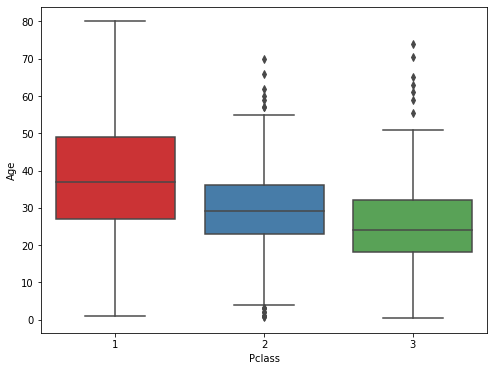

In [107]:
# We will fill the Missing values in the age column
# We will use means of Age of each Pclass

plt.figure(figsize=(8,6))
sns.boxplot(survive['Pclass'], survive['Age'], palette='Set1')

# Define a function that we will use to fill the missing values

def function(col):
  missing = col[0]
  fill = col[1]

  if pd.isnull(missing):
    if fill == 1:
      return 42
    if fill == 3:
      return 26
    if fill == 3:
      return 23

  else:
    return missing

#  We apply the function

survive['Age'] = survive[['Age', 'Pclass']].apply(function, axis = 1)
survive.isnull().sum()

# Drop remaing null values as they will not adversely affect our model

survive.dropna(inplace=True)
survive.isnull().sum()

In [108]:
# Check for unique values in our columns

print(survive.nunique())

# The name and Ticket columns are object columns with very many 
# unique elements, hence we will remoe them to improve our models performance

survive.drop(['Name', 'Ticket'], inplace=True, axis = 1)
survive.columns

Survived      2
Pclass        3
Name        878
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      672
Fare        245
Embarked      3
dtype: int64


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [109]:
# Remove white spaces

survive.columns = survive.columns.str.strip().str.replace('','')

Index = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for i, feat in enumerate(Index):
  survive[feat] = survive[feat].replace('','')

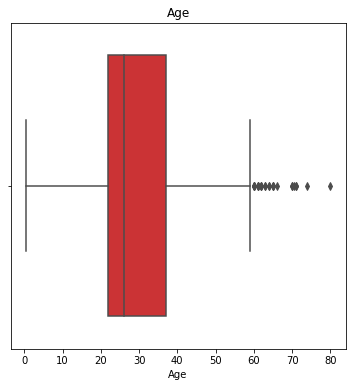

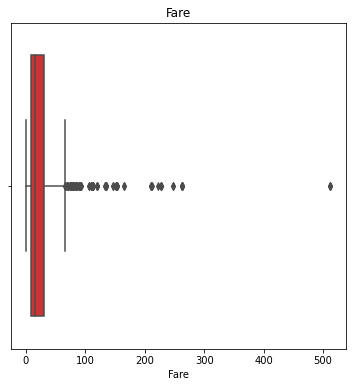

In [110]:
# Check for outliers in our continuous variable
column = ['Age', 'Fare']
survive.dtypes

for i,j in enumerate(column):
  plt.figure(figsize=(6,6))
  sns.boxplot(survive[j], palette='Set1')
  plt.title(j)

In [111]:
# Remove outliers

df = survive[survive['Fare']< 100]
df.info()

# This is the clean dataset
# Below are its attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Pclass    825 non-null    int64  
 2   Sex       825 non-null    object 
 3   Age       825 non-null    float64
 4   SibSp     825 non-null    int64  
 5   Parch     825 non-null    int64  
 6   Fare      825 non-null    float64
 7   Embarked  825 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 58.0+ KB


## Explanatory data analysis

### Univariate analysis

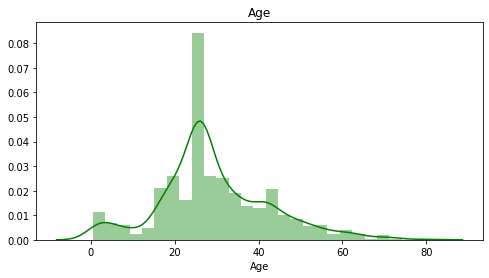

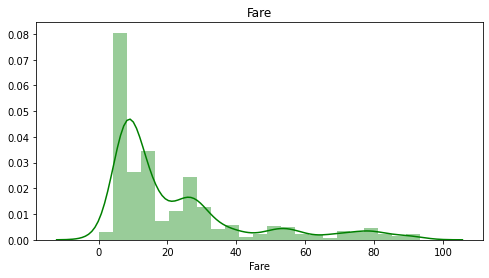

In [112]:
# Plot histogram for continious values

for i, j in enumerate(column):
  plt.figure(figsize=(8,4))
  sns.distplot(df[j], kde=True, color='Green')
  plt.title(j)

# Age is normaly distributed but Fare is negatively skewed hence might need feature scalling

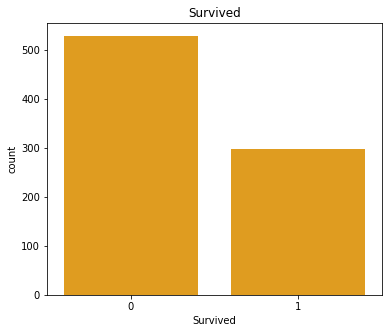

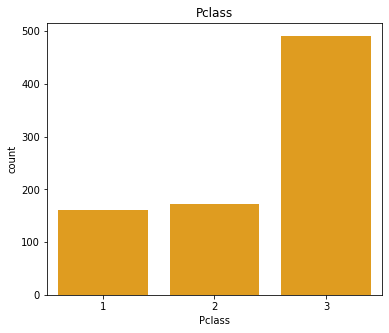

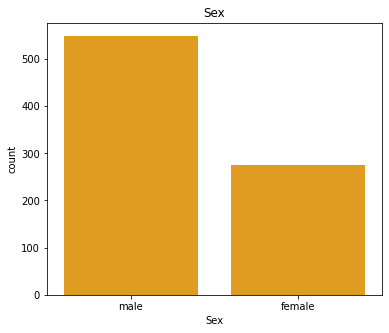

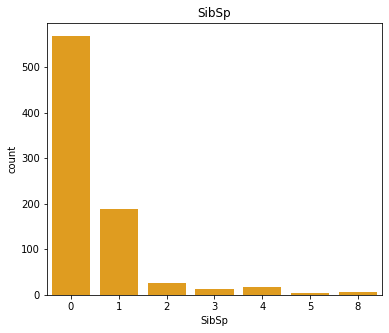

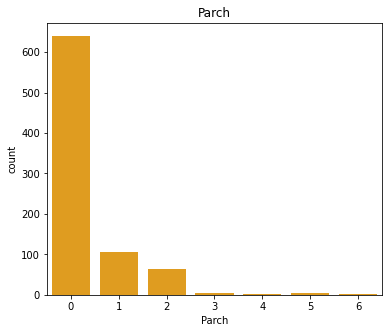

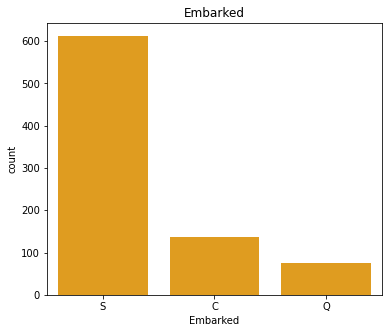

In [113]:
# We will visulaize a Countplot of our Categorical Variables
feature = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',  'Embarked']

for i,c in enumerate(feature):
  plt.figure(figsize=(6,5))
  sns.countplot(df[c], color='orange')
  plt.title(c)

# There were more non_survivers in our dataset than non_survivers
# Most peoplle were in third class
# Most people were male

###Bivariate analysis

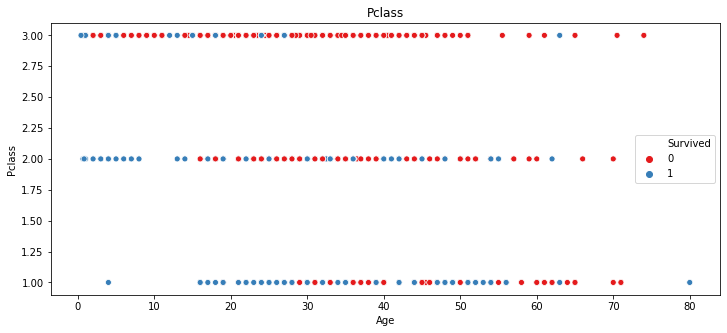

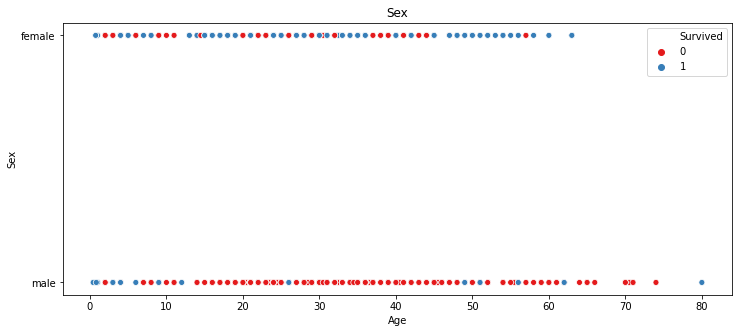

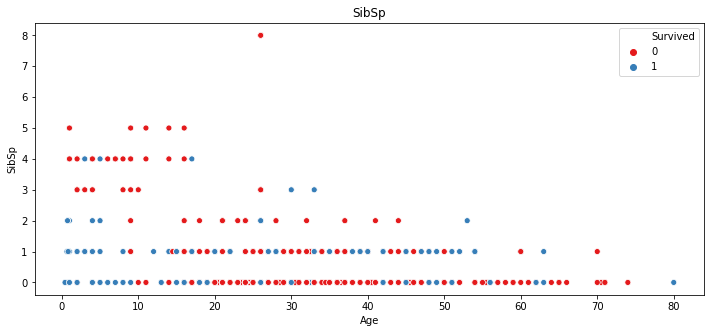

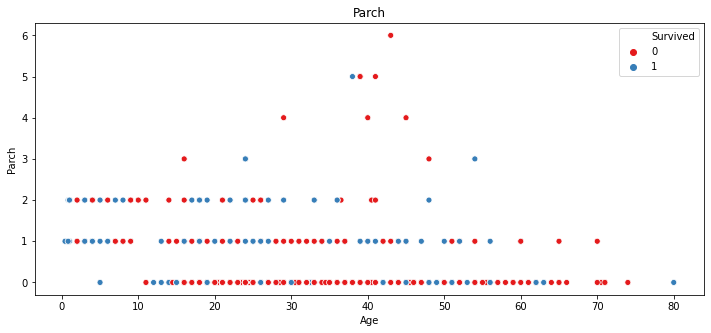

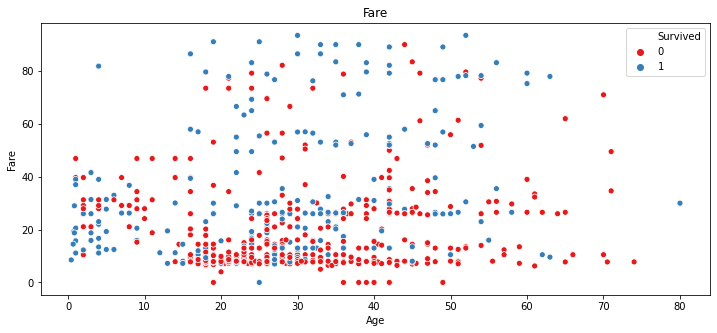

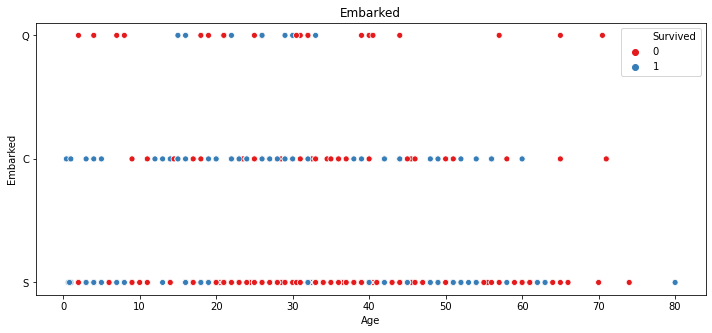

In [114]:
# The 'survive' column is our target variable
# we will use this variable for biariate analysis

# plot integer columns vs 'survive'

features = ['Pclass', 'Sex' ,'SibSp', 'Parch', 'Fare', 'Embarked']

for i,f in enumerate(features):
  plt.figure(figsize=(12,5))
  sns.scatterplot(df['Age'], df[f], hue=df['Survived'], palette='Set1')
  plt.title(f)

# most non_survivors where in the 3rd Pclass
# more female survived than male
# Lower Parch had more non_survivours
# People who paid higher fares survived more



In [115]:
# Convert string object to numerical
# Import Label Encoder
le = preprocessing.LabelEncoder()

column = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for i, feat in enumerate(column):

  df[feat] = le.fit_transform(df[feat])

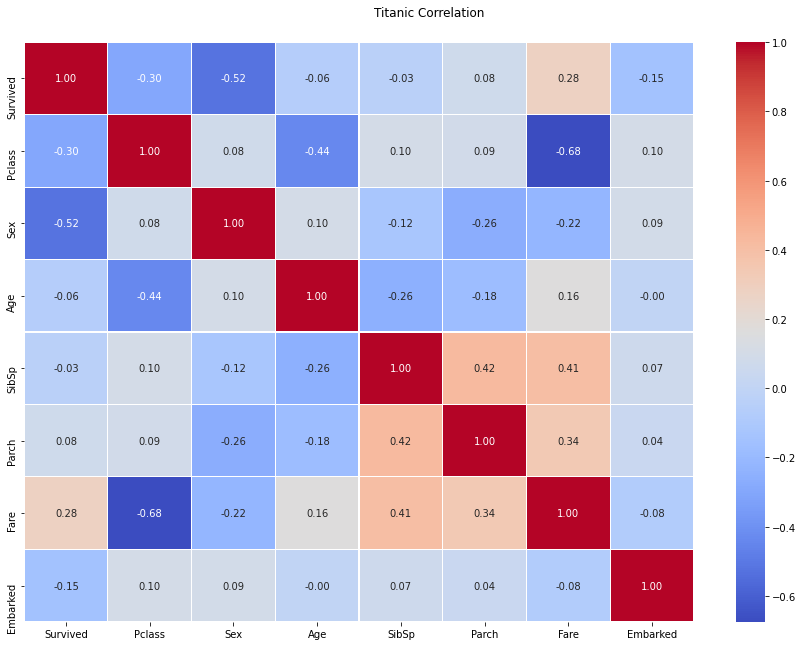

In [116]:
# create a corelation matrix
cor = f , ax = plt.subplots(figsize = (15,10))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('Titanic Correlation')

# survival is weakely positively correlated to Fare
# It is negatively corelated to sex, and Pclass
# And not correlated to the remaining columns

### Multivariate Analysis

####PCA

explained_variance_ratio_ =  [0.28698612 0.25834471]


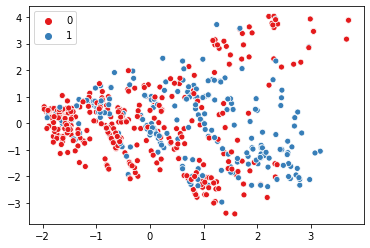

In [117]:
# using LDA
# We start by dividing our dataset into Features and Targets

y = df.iloc[: , : 1].values
X = df.iloc[:, 1 : ].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standarsize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#  Import LDA and feat our data

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X_train, y_train)

# Check the variance ratio
print('explained_variance_ratio_ = ' , pca.explained_variance_ratio_)

# plot our PDA graph

sns.scatterplot(x_pca[:,0], x_pca[:, 1], hue=y_train.flatten(), palette='Set1', alpha = 1)


##Implimenting the Solution

###Feature Selection

In [118]:
# Removing Redudant Features

corr_matrix = df.corr().abs()

# Select upper triangle of the Matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9

to_drop = [column for column in upper.columns if any(upper[column]> 0.9)]

# Drop marked feature

df.drop(df[to_drop], axis = 1)

df.columns

# No column was droped meaning all features are important for our analysis

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

###Modeling Data Using KNearest Neighbours

Randomly partition each dataset into two parts i.e 80 - 20  sets.

In [119]:
# Split data into Features and Labels

X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

# Split data into 20% test  and  80%train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Initialize the Model

clf = KNeighborsClassifier()

# Use gridsearch to find the best parameters

grid = GridSearchCV(clf, param_grid = {'n_neighbors': np.arange(3,11), 
                                       'metric' : ['minkowski','eucledian', 'cosine']}, cv = 5, n_jobs=1)

grid.fit(X_train, y_train)

print(grid.best_params_)



{'metric': 'cosine', 'n_neighbors': 9}


In [120]:
# fit the model

clf = KNeighborsClassifier(n_neighbors=9, metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[100  10]
 [ 29  26]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.72      0.47      0.57        55

    accuracy                           0.76       165
   macro avg       0.75      0.69      0.70       165
weighted avg       0.76      0.76      0.75       165



Randomly partition each dataset into two parts i.e 70 - 30  sets.

In [128]:
# Split data into Features and Labels

X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

# Split data into 20% test  and  80%train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# Initialize the Model

clf = KNeighborsClassifier()

# Use gridsearch to find the best parameters

grid = GridSearchCV(clf, param_grid = {'n_neighbors': np.arange(3,11), 
                                       'metric' : ['minkowski','eucledian', 'cosine']}, cv = 5, n_jobs=1)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'metric': 'cosine', 'n_neighbors': 5}


In [129]:
# fit the model

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[140  29]
 [ 37  42]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       169
           1       0.59      0.53      0.56        79

    accuracy                           0.73       248
   macro avg       0.69      0.68      0.68       248
weighted avg       0.73      0.73      0.73       248



Randomly partition each dataset into two parts i.e 60 - 40  sets.

In [123]:
# Split data into Features and Labels

X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

# Split data into 20% test  and  80%train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 50)

# Initialize the Model

clf = KNeighborsClassifier()

# Use gridsearch to find the best parameters

grid = GridSearchCV(clf, param_grid = {'n_neighbors': np.arange(3,11), 
                                       'metric' : ['minkowski','eucledian', 'cosine']}, cv = 5, n_jobs=1)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'metric': 'cosine', 'n_neighbors': 5}


In [124]:
# fit the model

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[186  40]
 [ 53  51]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       226
           1       0.56      0.49      0.52       104

    accuracy                           0.72       330
   macro avg       0.67      0.66      0.66       330
weighted avg       0.71      0.72      0.71       330



##Challenging the solution

The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.

From our analysis the best best KNeighbourClassifier had used 9 n_neighbours and cosine metric. It had an accuracy of 0.76 which is not too bad but also not great. 

It predicted 100 correct non survives 10 incorrect non surviver and 26 correct survivors and 29 incorrect survivers giving a accuracy of 0.76.

More research should be conducted in this field for the improvement of Ship Transport as on of the Limitation of our study was limited data to train our model


##Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?

Yes
 
because using the data we were able to conduct an analysis on our analytic question

b). Do we need other data to answer our question?

yes.

The data provided was insufficient

c). Did we have the right question?

yes

We were able to make conclusion from our data